In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_image/Barcelona Captain Lionel Messi Has....jpg')
img.shape

(405, 361, 3)

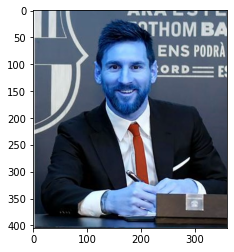

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(405, 361)

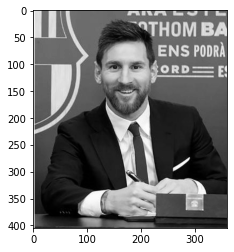

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[113,  60, 120, 120]], dtype=int32)

In [7]:
#Storing face values
(x,y,w,h) = faces[0]
x,y,w,h

(113, 60, 120, 120)

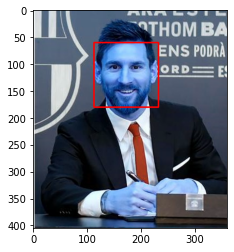

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

In [9]:
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

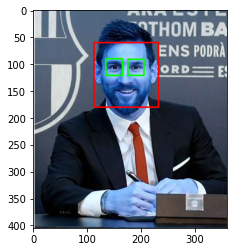

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray) #apply eyecascade
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap = 'gray')
plt.show()

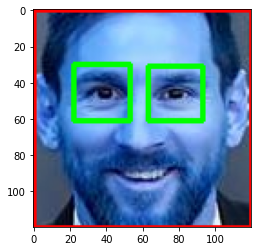

In [11]:
plt.imshow(roi_color, cmap='gray')

In [12]:
def get_cropped_image_visible_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

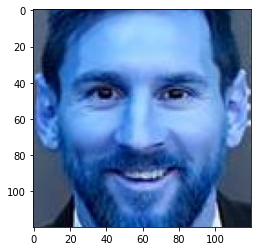

In [13]:
cropped_image = get_cropped_image_visible_eyes('./test_image/Barcelona Captain Lionel Messi Has....jpg')
plt.imshow(cropped_image)

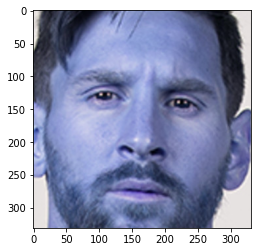

In [14]:
cropped_image = get_cropped_image_visible_eyes('./test_image/Lionel Messi - Stats_ Family & Facts....jpg')
plt.imshow(cropped_image)

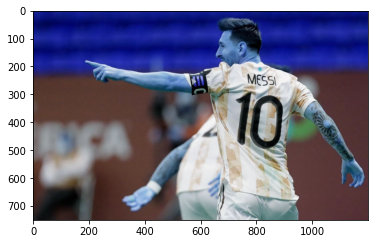

In [15]:
obstructed_image = cv2.imread('./test_image/MEssi.jpeg')
plt.imshow(obstructed_image)

In [16]:
cropped_image_with_obstruction = get_cropped_image_visible_eyes('./test_image/MEssi.jpeg')
cropped_image_with_obstruction

In [17]:

path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"


import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs

['./dataset/alex_morgan',
 './dataset/c_ronaldo',
 './dataset/jr_neymar',
 './dataset/kun_aguero',
 './dataset/leo_messi']

In [19]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
cropped_image_dirs = []
player_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    player_name = img_dir.split('/')[-1]
    player_file_names_dict[player_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_visible_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + player_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = player_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            player_file_names_dict[player_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/alex_morgan
Generating cropped images in folder:  ./dataset/cropped/c_ronaldo
Generating cropped images in folder:  ./dataset/cropped/jr_neymar
Generating cropped images in folder:  ./dataset/cropped/kun_aguero
Generating cropped images in folder:  ./dataset/cropped/leo_messi


In [23]:
import pywt
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

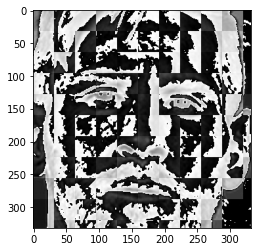

In [24]:
wavelet = w2d(cropped_image, 'db1', 5)
plt.imshow(wavelet, cmap='gray')

In [25]:
player_file_names_dict

{'alex_morgan': ['./dataset/cropped/alex_morgan/alex_morgan1.png',
  './dataset/cropped/alex_morgan/alex_morgan2.png',
  './dataset/cropped/alex_morgan/alex_morgan3.png',
  './dataset/cropped/alex_morgan/alex_morgan4.png',
  './dataset/cropped/alex_morgan/alex_morgan5.png',
  './dataset/cropped/alex_morgan/alex_morgan6.png',
  './dataset/cropped/alex_morgan/alex_morgan7.png',
  './dataset/cropped/alex_morgan/alex_morgan8.png',
  './dataset/cropped/alex_morgan/alex_morgan9.png',
  './dataset/cropped/alex_morgan/alex_morgan10.png',
  './dataset/cropped/alex_morgan/alex_morgan11.png',
  './dataset/cropped/alex_morgan/alex_morgan12.png',
  './dataset/cropped/alex_morgan/alex_morgan13.png',
  './dataset/cropped/alex_morgan/alex_morgan14.png',
  './dataset/cropped/alex_morgan/alex_morgan15.png',
  './dataset/cropped/alex_morgan/alex_morgan16.png',
  './dataset/cropped/alex_morgan/alex_morgan17.png',
  './dataset/cropped/alex_morgan/alex_morgan18.png',
  './dataset/cropped/alex_morgan/alex_mo

In [28]:
class_dict = {}
count = 0
for player_name in player_file_names_dict.keys():
    class_dict[player_name] = count
    count = count + 1
class_dict

{'alex_morgan': 0,
 'c_ronaldo': 1,
 'jr_neymar': 2,
 'kun_aguero': 3,
 'leo_messi': 4}

In [49]:
X = []
y = []

for player_name, training_files in player_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32,32))
        img_wave = w2d(img, 'db1', 5)
        scalled_image_wave = cv2.resize(img_wave, (32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_image_wave.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[player_name])

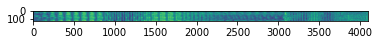

In [52]:
plt.imshow(X)

In [50]:
len(X)

120

In [53]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(120, 4096)

In [54]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

#More images -> more accuracy

0.7666666666666667

In [61]:
len(X_test)

30

In [67]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.57      0.89      0.70         9
           1       0.75      0.60      0.67         5
           2       1.00      0.33      0.50         6
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         3

    accuracy                           0.77        30
   macro avg       0.86      0.76      0.77        30
weighted avg       0.83      0.77      0.75        30



### Finding the best model with fine tuned parameters


In [70]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [71]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [72]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.711111,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.511111,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.777778,{'logisticregression__C': 1}


In [73]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [74]:
scores

[{'model': 'svm',
  'best_score': 0.711111111111111,
  'best_params': {'svc__C': 1, 'svc__kernel': 'linear'}},
 {'model': 'random_forest',
  'best_score': 0.5111111111111111,
  'best_params': {'randomforestclassifier__n_estimators': 5}},
 {'model': 'logistic_regression',
  'best_score': 0.7777777777777778,
  'best_params': {'logisticregression__C': 1}}]

In [76]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.8333333333333334

In [77]:
best_clf = best_estimators['logistic_regression']

{'alex_morgan': 0, 'c_ronaldo': 1, 'jr_neymar': 2, 'kun_aguero': 3, 'leo_messi': 4}


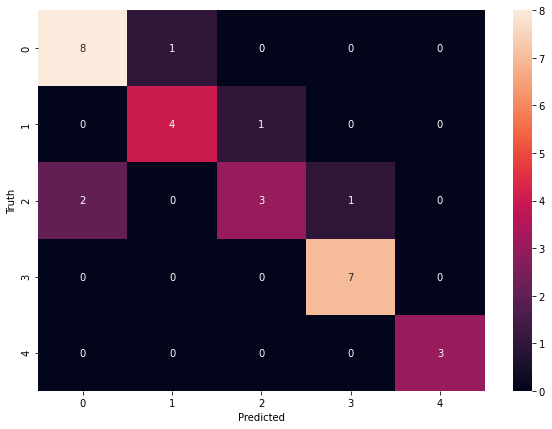

In [80]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

print(class_dict)

In [82]:
import joblib
joblib.dump(best_clf, 'final_model.pkl')

['final_model.pkl']

In [83]:
import json
with open ("Class_dictionary.json", "w") as f:
    f.write(json.dumps(class_dict))